In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [6]:
dataFrame = pd.read_excel("../week2.xlsx")

In [7]:
dataFrame=dataFrame.rename(columns = {'Total DL (Bytes)' : 'totalDL','Total UL (Bytes)' : 'totalUL','Dur. (ms)' : 'dur','MSISDN/Number':'msisdn','Last Location Name':'location','Handset Manufacturer':'manufacturer','Handset Type':'handset'})

# get total data transferred for each application
google = dataFrame['Google DL (Bytes)']+ dataFrame['Google UL (Bytes)']
email = dataFrame['Email DL (Bytes)']+ dataFrame['Email UL (Bytes)']
gaming = dataFrame['Gaming DL (Bytes)']+ dataFrame['Gaming UL (Bytes)']
youtube = dataFrame['Youtube DL (Bytes)']+ dataFrame['Youtube UL (Bytes)']
netflix = dataFrame['Netflix DL (Bytes)']+ dataFrame['Netflix UL (Bytes)']
social = dataFrame['Social Media DL (Bytes)']+ dataFrame['Social Media UL (Bytes)']

dataFrame['google']=google
dataFrame['email']=email
dataFrame['gaming']=gaming
dataFrame['youtube']=youtube
dataFrame['netflix']=netflix
dataFrame['social']=social


relevantDataFrame = dataFrame[['dur','totalDL','totalUL','google','email','gaming','youtube','netflix','social']]




## Cleaning Data

In [8]:
median=relevantDataFrame['dur'].median()
relevantDataFrame["dur"] = np.where(relevantDataFrame["dur"] >400000, median,relevantDataFrame['dur'])

relevantDataFrame.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dur,totalDL,totalUL,google,email,gaming,youtube,netflix,social
count,150000.000000,1.500000e+05,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,99786.623793,4.546434e+08,4.112121e+07,7.807295e+06,2.259102e+06,4.303331e+08,2.264348e+07,2.262861e+07,1.828250e+06
std,62859.909937,2.441429e+08,1.127639e+07,3.516420e+06,1.071109e+06,2.440199e+08,9.246800e+06,9.260820e+06,1.035646e+06
min,7142.000000,7.114041e+06,2.866892e+06,4.033000e+04,8.359000e+03,3.063580e+05,7.890300e+04,9.843200e+04,1.563000e+03
25%,57440.500000,2.431068e+08,3.322201e+07,4.943599e+06,1.359344e+06,2.187279e+08,1.599846e+07,1.597946e+07,9.322180e+05
50%,86399.000000,4.558411e+08,4.114331e+07,7.812835e+06,2.263567e+06,4.316150e+08,2.266177e+07,2.263554e+07,1.826471e+06
75%,129367.000000,6.657055e+08,4.903424e+07,1.068280e+07,3.159818e+06,6.414159e+08,2.929260e+07,2.929044e+07,2.727487e+06
max,399875.000000,9.029696e+08,7.833131e+07,1.552878e+07,4.518036e+06,8.592028e+08,4.519008e+07,4.519815e+07,3.650861e+06


### From the above we can see that
1. Users download more than they upload
2. Users have a similar demand to upload than to download ( upload has less standard deviation )
3. Users of the service spend more on gaming applications


Text(0.5, 0, 'Duration (ms)')

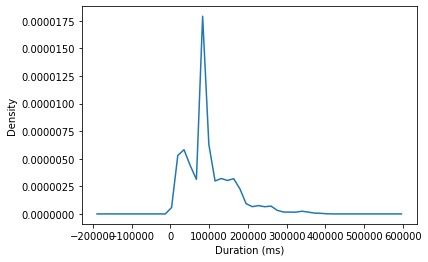

In [9]:
ax=relevantDataFrame['dur'].plot.density(ind=50)
ax.set_xlabel('Duration (ms)')
#sb.distplot(relevantDataFrame, hist=False)


## The above density plot shows that most of the sessions last between 0 and 25000000ms 

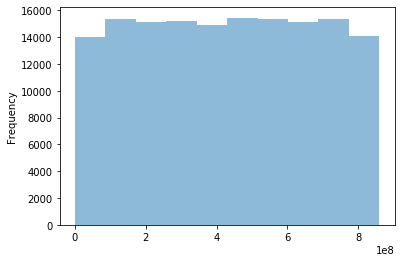

In [10]:
ax= relevantDataFrame['gaming'].plot.hist(alpha=0.5)

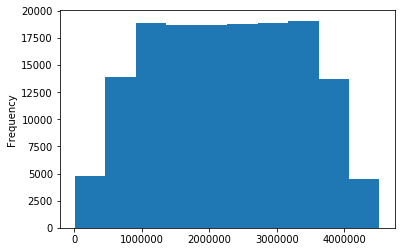

In [11]:
relevantDataFrame['email'].plot.hist()

## The above two graphs explain email consumes data transfers that are simmilar accross many sessions, but the data consumed by gaming seems to vary more

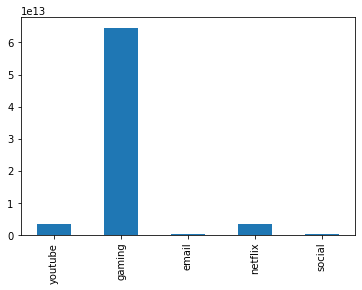

In [12]:
#sum_column = dataFrame["totalUL"] + dataFrame["totalDL"]
relevantDataFrame[['youtube','gaming','email','netflix','social']].sum().plot(kind='bar')

## The above plot confirms user spend the most on gaming.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Data Transfers')

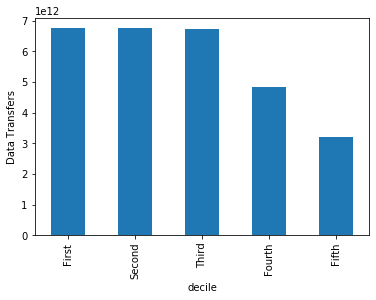

In [13]:
sum_column = dataFrame["totalUL"] + dataFrame["totalDL"]
relevantDataFrame['totalData']=sum_column

relevantDataFrame['decile'] = pd.qcut(relevantDataFrame['dur'],11,duplicates='drop')
ax=relevantDataFrame.groupby('decile')['totalData'].sum().sort_values(ascending=False).tail(5).plot(kind='bar',xticks=[0,1,2,3,4])
ax.set_xticklabels(['First','Second','Third','Fourth','Fifth'])
ax.set_ylabel('Data Transfers')

## The above code first segments the users into 10 fractions based on durations of the sessions. Then it counts the total data transferred in each decile and plot the top 5

In [14]:
relevantDataFrame[['email','gaming','youtube','social','netflix']].corr(method ='pearson') 

,email,gaming,youtube,social,netflix
email,1.000000,-0.000644,-0.002919,0.004032,0.001029
gaming,-0.000644,1.000000,-0.002999,0.001082,-0.003109
youtube,-0.002919,-0.002999,1.000000,0.000548,0.002882
social,0.004032,0.001082,0.000548,1.000000,0.001013
netflix,0.001029,-0.003109,0.002882,0.001013,1.000000


## From the above correlation matrix we can conclude :

1. social media and email are more correlated than others. ( Social media users also use email )
2. The correlation b/n youtube and email, netflix and email have relatively higher negative correlation (Entertainement users tend to use email occasionally)

In [22]:
relevantDataFrame = dataFrame[['Bearer Id','dur','totalDL','totalUL','google','email','gaming','youtube','netflix','social']]
relevantDataFrame['totalAppData'] = relevantDataFrame['google'] + relevantDataFrame['youtube'] +relevantDataFrame['email']+relevantDataFrame['netflix']


# add satisfaction column to a dataframe 
# ( Satisfaction is just an arbitrary class based on totalAppData, just to show Principal column analysis)
def addSatisfactionLevel(row):
    
    if 55338486 <row['totalAppData']:
        val = 'First Class'
    elif 7432209.0 < row['totalAppData'] <55338486:
        val = 'Second Class'
    else: 
        val='N/A'
    return val


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Below we insert a categorical column named satisfaction ( just for illustration purpose ) which has 2 classes. First class and Second class based on the total amount of data transferred on each session.

In [20]:
dataFrame=dataFrame.rename(columns = {'Total DL (Bytes)' : 'totalDL','Total UL (Bytes)' : 'totalUL','Dur. (ms)' : 'dur','MSISDN/Number':'msisdn','Last Location Name':'location','Handset Manufacturer':'manufacturer','Handset Type':'handset'})

google = dataFrame['Google DL (Bytes)']+ dataFrame['Google UL (Bytes)']
email = dataFrame['Email DL (Bytes)']+ dataFrame['Email UL (Bytes)']
gaming = dataFrame['Gaming DL (Bytes)']+ dataFrame['Gaming UL (Bytes)']
youtube = dataFrame['Youtube DL (Bytes)']+ dataFrame['Youtube UL (Bytes)']
netflix = dataFrame['Netflix DL (Bytes)']+ dataFrame['Netflix UL (Bytes)']
social = dataFrame['Social Media DL (Bytes)']+ dataFrame['Social Media UL (Bytes)']

dataFrame['google']=google
dataFrame['email']=email
dataFrame['gaming']=gaming
dataFrame['youtube']=youtube
dataFrame['netflix']=netflix
dataFrame['social']=social

#print(relevantDataFrame.head())


relevantDataFrame['Satisfaction'] = relevantDataFrame.apply(addSatisfactionLevel, axis=1)
relevantDataFrame.head(10)

,Bearer Id,dur,totalDL,totalUL,google,email,gaming,youtube,netflix,social,totalAppData,Satisfaction
0,13114483460844900352,1823652.0,308879636.0,36749741.0,2905912.0,3701304.0,292426453.0,18355943.0,17855187.0,1570185.0,42818346.0,Second Class
1,13114483482878900224,1365104.0,653384965.0,53800391.0,4414096.0,937385.0,609920783.0,39359124.0,35565545.0,1933278.0,80276150.0,First Class
2,13114483484080500736,1361762.0,279807335.0,27883638.0,10229119.0,3363124.0,229980251.0,34425237.0,23751202.0,1726277.0,71768682.0,First Class
3,13114483485442799616,1321509.0,846028530.0,43324218.0,11811761.0,2070983.0,810387875.0,36534765.0,15092588.0,657493.0,65510097.0,First Class
4,13114483499480700928,1089009.0,569138589.0,38542814.0,7748843.0,2110349.0,531237049.0,34222253.0,17539799.0,912788.0,61621244.0,First Class
5,13114483499779198976,1074638.0,754452212.0,30307754.0,12934133.0,2902410.0,723461512.0,23944031.0,13881809.0,3200014.0,53662383.0,Second Class
6,13114483501243799552,1035261.0,70562047.0,47925246.0,4906872.0,2090979.0,58881157.0,9120760.0,31212766.0,1624991.0,47331377.0,Second Class
7,13042425910865399808,951292.0,775350343.0,58813016.0,3872713.0,3500104.0,765055811.0,31924969.0,18933702.0,3161403.0,58231488.0,First Class
8,13114483506432499712,941634.0,861612261.0,42363146.0,8902099.0,3380069.0,828219634.0,29297508.0,19054441.0,372625.0,60634117.0,First Class
9,13042425914669299712,864482.0,850570347.0,22417975.0,8778341.0,766046.0,812946425.0,22911539.0,13185350.0,1585413.0,45641276.0,Second Class


## As we can see we have 4 Second Class and 6 First Class Entries for satisfaction. Lets check if we can get the same result after reducing the dimensionality.

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = ['social', 'email','netflix','youtube', 'gaming']
x=relevantDataFrame.loc[:, features].values
pca = PCA(n_components=2)
scaler=StandardScaler()
scaler.fit(x)
StandardScaler(copy=True, with_mean=True,with_std=True)
scaled_data=scaler.transform(x)
pca.fit(scaled_data)

principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(scaled_data.shape)
principalComponents.shape


(150001, 5)


(150001, 2)

### As shown above we have managed to reduce the dimensions from 5 down to 2 without losing too much information

### Let us see if the reduced dataframe results in the same satisfaction level

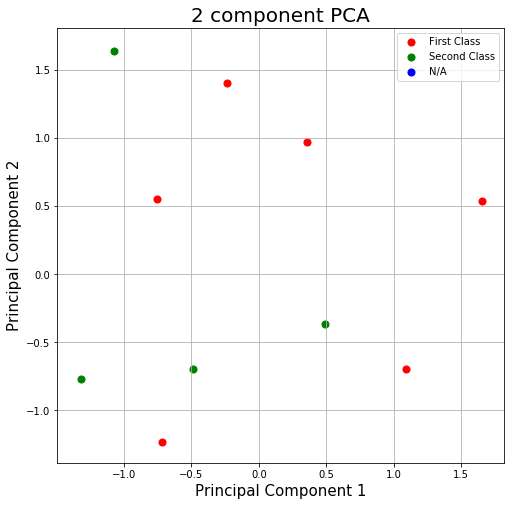

In [21]:
finalDf = pd.concat([principalDf, relevantDataFrame[['Satisfaction']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['First Class', 'Second Class', 'N/A']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Satisfaction'] == target
    ax.scatter(finalDf.head(10).loc[indicesToKeep, 'principal component 1']
               , finalDf.head(10).loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


## As we can see from the above plot we get the same result as before, even after reducing the diensinality.